This notebook has code for HAM10000. It will be later sorted into individual articles.

# HAM10000 Source Loading

First, download the data from the [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T) - it will ask you confirm the data license. This process might take a while since it is roughly 3GB to download. 

In this section, we assume the downloaded zip folder name is `HAM10000_data.zip`. This section unzips the files and organizes the data. Additionally, since the images are split into two folders, we merge it into one folder.

The file structure for the data assumed for the project is:

```
HAM10000
└───data
    ├── README.md
    ├── source
    │   ├── HAM10000.zip
    │   ├── HAM10000_images_part_1.zip
    │   ├── HAM10000_images_part_2.zip
    │   ├── HAM10000_metadata
    │   ├── HAM10000_segmentations_lesion_tschandl.zip
    │   ├── ISIC2018_Task3_Test_Images.zip
    │   └── ISIC2018_Task3_Test_NatureMedicine_AI_Interaction_Benefit.tab
    └── original
        ├── HAM10000_images_part_1
        │   ├── ISIC_XXXXXXX.jpg
        │   └── ...
        ├── HAM10000_images_part_2
        │   ├── ISIC_XXXXXXX.jpg
        │   └── ...
        ├── HAM10000_images_all
        │   ├── ISIC_XXXXXXX.jpg
        │   └── ...
        ├── HAM10000_metadata
        ├── HAM10000_segmentations_lesion_tschandl
        │   ├── ISIC_XXXXXXX_segmentation.png
        │   └── ISIC_0024307_segmentation.png
        └── ISIC2018_Task3_Test_Images
            ├── ISIC_XXXXXXX.jpg
            └── ...
    ...
```
All the data lives in the `data` folder. The `data/source` folder has the raw zip file, `HAM10000.zip`, we downloaded. It will also have the raw content we extract from the `HAM10000.zip` file (there are 6 items). The `data/original` folder will have the relevant files extracted and ready to for use. The original data source split the training images to two folders, called `HAM10000_images_part_1` and `HAM10000_images_part_2`. For convenience, we combine them into one folder called `HAM10000_image_all`. Additionally, there's the `HAM10000_metadata` which has info on the images (such demographics and labels). There's `HAM10000_segmentations_lesion_tschandl` which has segmentations and `ISIC2018_Task3_Test_Images` which are the test images.

Any cached or custom versions of the data will live in the `HAM10000/data` folder inside it's own folder. For example, if I reduce the size of every image, I might store that in `HAM10000/data/reduced_images`.

In [1]:
# libraries
import os
import zipfile
import shutil

In [2]:
# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print(cwd)

/Users/nabibahmed/Desktop/Local/Brand/HAM10000/articles


In [3]:
# setting the base directory based on the cwd - it should be where the HAM10000 project repo is
base_dir = '/Users/nabibahmed/Desktop/Local/Brand/HAM10000'

In [4]:
def extract_zips(base_dir : str = base_dir) -> None:
    """
    Extract the zip files downloaded from datasource
    """
    # source directory for the zip files
    source_dir = os.path.join(base_dir, "data", "source")
    
    # path to the zip files
    zipfiles = dict(
        HAM10000_images_part_1 = os.path.join(source_dir, "HAM10000_images_part_1.zip"),
        HAM10000_images_part_2 = os.path.join(source_dir, "HAM10000_images_part_2.zip"),
        HAM10000_segmentations_lesion_tschandl = os.path.join(source_dir, "HAM10000_segmentations_lesion_tschandl.zip"),
        ISIC2018_Task3_Test_Images = os.path.join(source_dir, "ISIC2018_Task3_Test_Images.zip"),
    )
    
    # destination folder
    destination_dir = os.path.join(base_dir, "data", "original")
    
    # check if destination folder exists
    if os.path.exists(destination_dir):
        print(f"Destination directory exists: {destination_dir} \nAssumes files have been extracted!")
        return None
    
    # unzips and places in destination
    for name, path in zipfiles.items():
        with zipfile.ZipFile(path) as zf:
            zf.extractall(os.path.join(destination_dir, name))
    
    print(f"Destination directory created: {destination_dir} \nFiles have been extracted!")

extract_zips()

Destination directory exists: /Users/nabibahmed/Desktop/Local/Brand/HAM10000/data/original 
Assumes files have been extracted!


In [5]:
def merge_HAM10000_images(base_dir : str = base_dir) -> None:
    """
    Combines the HAM10000 part 1 and part 2 folders into one
    """
    # original directory where the part 1 and part 2 folders exist
    original_dir = os.path.join(base_dir, "data", "original")
    
    # part 1 and part 2 folders
    part_1 = os.path.join(original_dir, "HAM10000_images_part_1")
    part_2 = os.path.join(original_dir, "HAM10000_images_part_2")
    
    # destination folder
    destination_dir = os.path.join(base_dir, "data", "original", "HAM10000_images_all")
    
    # check if destination folder exists
    if os.path.exists(destination_dir):
        print(f"Destination directory exists: {destination_dir} \nAssumes parts have been merged!")
        return None

    # creates the destination folder
    os.mkdir(destination_dir)
    
    # copying over the files
    for p in [part_1, part_2]:
        files_to_copy = os.listdir(p)

        for file in files_to_copy:
            shutil.copy(os.path.join(p, file), os.path.join(destination_dir, file))
    
    # print confirmation
    print(f"Created destination directory: {destination_dir}")
    print(f"The total number of images in the directory is: {len(os.listdir(destination_dir))}")

merge_HAM10000_images()   

Destination directory exists: /Users/nabibahmed/Desktop/Local/Brand/HAM10000/data/original/HAM10000_images_all 
Assumes parts have been merged!


# HAM10000 Utilities

In [6]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# setting the base directory based on the cwd - it should be where the HAM10000 project repo is
base_dir = '/Users/nabibahmed/Desktop/Local/Brand/HAM10000'

In [8]:
# load in the metadata.csv file
metadata_df = pd.read_csv(os.path.join(base_dir, "data", "original", "HAM10000_metadata"))
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [9]:
# get the image ids
image_ids = metadata_df["image_id"].to_numpy()

# create a function to remove the `ISIC_` prefix
def remove_prefix(s: str) -> str:
    return s.split("ISIC_")[1]

# apply to all the image_ids
v_remove_prefix = np.vectorize(remove_prefix)
image_ids = v_remove_prefix(image_ids)

In [10]:
def image_path(id: str, log: bool = False) -> str:
    """
    Given an id, it returns the file_path
    """
    # path to the image
    data_dir = os.path.join(base_dir, "data", "original", "HAM10000_images_all")
    path = os.path.join(data_dir, f"ISIC_{id}.jpg")
    
    # looks for the path and returns it if found
    if os.path.exists(path):
        if log: print(f"Image path exists: {path}")
        return path
    else:
        print(f"Image path doesn't exists: {path}")
        raise OSError(f"Image path doesn't exists: {path}")

In [11]:
from PIL import Image
LOGO = Image.open(os.path.join(base_dir, "output", "Symbol_Logo_Transparent.png"))

In [12]:
CODE_TO_FULL = {
        'akiec': "Actinic Keratoses / Bowen's Disease", 
        'bcc': "Basal Cell Carcinoma", 
        'bkl': "Benign Keratoses", 
        'df': "Dermatofibroma", 
        'mel': "Melanoma", 
        'nv': "Melanocytic Nevi", 
        'vasc': "Vascular Lesions"
    }

# Skin Cancer Detection with HAM10000: Introduction

In [13]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

array([[[25, 15, 23],
        [25, 14, 22],
        [25, 14, 22],
        ...,
        [62, 38, 64],
        [58, 38, 63],
        [59, 39, 64]],

       [[25, 12, 22],
        [23, 12, 20],
        [26, 15, 23],
        ...,
        [62, 39, 67],
        [61, 38, 64],
        [60, 36, 62]],

       [[21, 14, 22],
        [24, 12, 24],
        [25, 12, 21],
        ...,
        [60, 37, 65],
        [62, 37, 67],
        [61, 37, 63]],

       ...,

       [[62, 37, 58],
        [62, 38, 60],
        [60, 41, 63],
        ...,
        [24, 13, 19],
        [22, 13, 14],
        [23, 11, 23]],

       [[62, 37, 59],
        [62, 38, 62],
        [64, 38, 65],
        ...,
        [24, 12, 22],
        [22, 11, 25],
        [24, 12, 22]],

       [[62, 36, 61],
        [61, 37, 61],
        [61, 35, 60],
        ...,
        [22, 12, 23],
        [22, 11, 25],
        [23, 12, 26]]], dtype=uint8)

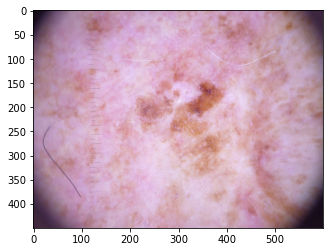

In [154]:
def plot_one_image(id: str, visualize: bool = True) -> None:
    # get path to the image
    path = image_path(id)
    
    # get the image data
    img = imread(path)
    
    # plot the image
    if visualize:
        f = plt.figure()
        plt.imshow(img)
    
    return img
    
plot_one_image("0025030", True)

In [15]:
def image_for_diagnosis(diagnosis: str, num_of_images : int = 1, random_state : int = 0):
    """
    Give it diagnosis, and it returns a random image of that diagnosis
    """
    # random generator
    rng = np.random.default_rng(random_state)

    # check to see if we get a valid diagnosis
    potential_diagnosis = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
    if diagnosis not in potential_diagnosis:
        print(f"Diagnosis {diagnosis} is invalid")
        return None
    
    # we isolate the diagnosis
    df = metadata_df.copy() # copy our dataset of labels
    df = df[df["dx"] == diagnosis]

    if num_of_images > len(df):
        print(f"Number of request images ({num_of_images}) exceed number of rows ({len(df)})")

    # select random rows
    row_nums = rng.integers(0, len(df), num_of_images)
    df = df.iloc[row_nums]

    # get the images
    image_names = np.array(list(df["image_id"]))
    image_names = v_remove_prefix(image_names)
    images = [] # store the images we collect
    for i in image_names:
        img_path = image_path(i) # gettting the path
        img = imread(img_path) # loading the image
        images.append(img) # adding to our array
    
    return images

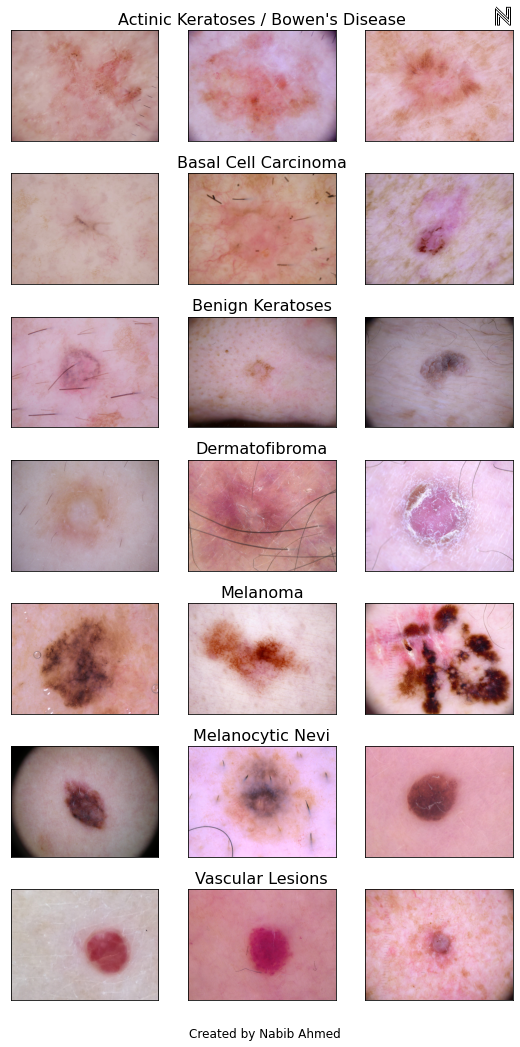

In [22]:
def display_diagnosis(num_of_images : int = 1, random_state : int = 0, save: bool = False) -> None:
    # display images
    potential_diagnosis = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
    code_to_full = {
        'akiec': "Actinic Keratoses / Bowen's Disease", 
        'bcc': "Basal Cell Carcinoma", 
        'bkl': "Benign Keratoses", 
        'df': "Dermatofibroma", 
        'mel': "Melanoma", 
        'nv': "Melanocytic Nevi", 
        'vasc': "Vascular Lesions"
    }
    fig, axs = plt.subplots(len(potential_diagnosis), num_of_images, figsize=(9,18))
    for index, d in enumerate(potential_diagnosis):
        images = image_for_diagnosis(d, num_of_images=num_of_images, random_state=random_state)
        for i in range(len(images)):
            axs[index, i].imshow(images[i])
            if i == 1:
                axs[index, i].set_title(f'{code_to_full[d]}', fontsize=16)
            axs[index, i].set_xticks([])
            axs[index, i].set_yticks([])
            
    # add Created by Nabib Ahmed
    fig.text(0.4, 0.1, "Created by Nabib Ahmed", fontsize=12)
    
    # add Logo
    logo = fig.add_axes([.87, .865, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "sample_imgs1"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
display_diagnosis(num_of_images=3, random_state=5, save = True)

# Data Collection for HAM10000

In [23]:
def print_labels(code_to_full = CODE_TO_FULL) -> None:
    for abbrev, name in code_to_full.items():
        print(f"{name} ({abbrev})")
print_labels()

Actinic Keratoses / Bowen's Disease (akiec)
Basal Cell Carcinoma (bcc)
Benign Keratoses (bkl)
Dermatofibroma (df)
Melanoma (mel)
Melanocytic Nevi (nv)
Vascular Lesions (vasc)


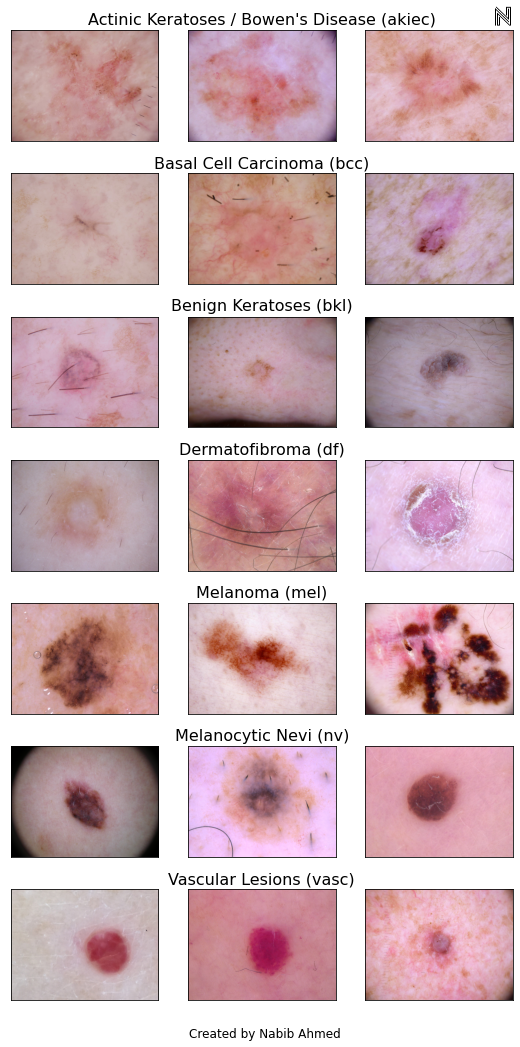

In [24]:
def display_diagnosis2(num_of_images : int = 1, random_state : int = 0, save: bool = False) -> None:
    # display images
    potential_diagnosis = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
    code_to_full = {
        'akiec': "Actinic Keratoses / Bowen's Disease", 
        'bcc': "Basal Cell Carcinoma", 
        'bkl': "Benign Keratoses", 
        'df': "Dermatofibroma", 
        'mel': "Melanoma", 
        'nv': "Melanocytic Nevi", 
        'vasc': "Vascular Lesions"
    }
    fig, axs = plt.subplots(len(potential_diagnosis), num_of_images, figsize=(9,18))
    for index, d in enumerate(potential_diagnosis):
        images = image_for_diagnosis(d, num_of_images=num_of_images, random_state=random_state)
        for i in range(len(images)):
            axs[index, i].imshow(images[i])
            if i == 1:
                axs[index, i].set_title(f'{code_to_full[d]} ({d})', fontsize=16)
            axs[index, i].set_xticks([])
            axs[index, i].set_yticks([])
            
    # add Created by Nabib Ahmed
    fig.text(0.4, 0.1, "Created by Nabib Ahmed", fontsize=12)
    
    # add Logo
    logo = fig.add_axes([.87, .865, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "sample_imgs2"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
display_diagnosis2(num_of_images=3, random_state=5, save = True)

# Exploring the HAM10000 Dataset

In [19]:
metadata_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset'],
      dtype='object')

In [20]:
metadata_df["lesion_id"].value_counts()

HAM_0003789    6
HAM_0000835    6
HAM_0005263    6
HAM_0001863    6
HAM_0007427    5
              ..
HAM_0006000    1
HAM_0002762    1
HAM_0006894    1
HAM_0007132    1
HAM_0003347    1
Name: lesion_id, Length: 7470, dtype: int64

In [21]:
# tells me it's patient tracking since its the same age, sex, and localization
metadata_df[metadata_df["lesion_id"] == "HAM_0001863"]

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
1714,HAM_0001863,ISIC_0032797,mel,histo,70.0,male,upper extremity,vidir_modern
1715,HAM_0001863,ISIC_0032596,mel,histo,70.0,male,upper extremity,vidir_modern
1716,HAM_0001863,ISIC_0032856,mel,histo,70.0,male,upper extremity,vidir_modern
1717,HAM_0001863,ISIC_0033193,mel,histo,70.0,male,upper extremity,vidir_modern
1718,HAM_0001863,ISIC_0033125,mel,histo,70.0,male,upper extremity,vidir_modern
1719,HAM_0001863,ISIC_0032810,mel,histo,70.0,male,upper extremity,vidir_modern


In [165]:
metadata_df["dataset"].value_counts()

vidir_molemax    3954
vidir_modern     3363
rosendahl        2259
vienna_dias       439
Name: dataset, dtype: int64

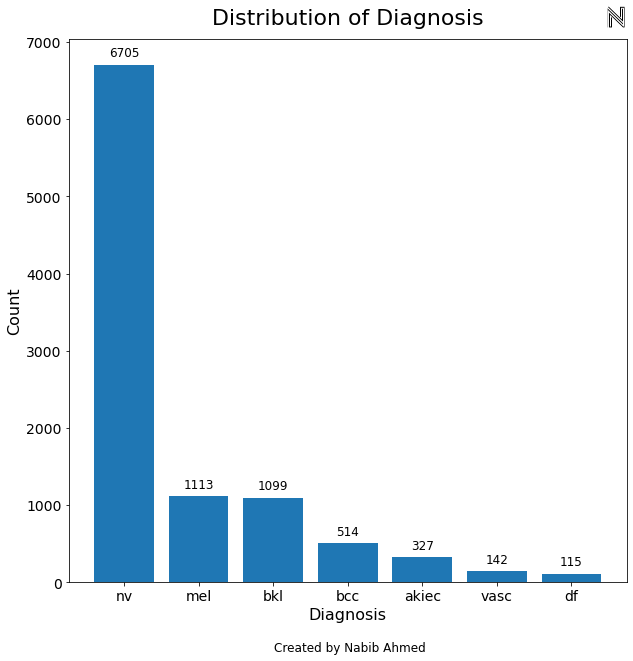

In [25]:
def dx_distribution(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # extract the data
    d = metadata_df["dx"]
    
    label, count = d.value_counts().index, d.value_counts().values

    
    # make a plot
    fig, ax = plt.subplots(figsize=(10,10))
    bars = ax.bar(label, count)
    
    #add axis labels
    ax.set_ylabel('Count', fontsize=16, rotation=90)
    ax.set_xlabel('Diagnosis', fontsize=16, rotation=0)
    
    # adjust the position of label
    # ax.yaxis.set_label_coords(0, 1.03)
    # ax.xaxis.set_label_coords(1.0, -.03)
    
    # adjust the tick mark
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    # add title
    ax.set_title("Distribution of Diagnosis", fontsize=22, pad=15)
    
    # add Created by Nabib Ahmed
    fig.text(0.41, 0.03, "Created by Nabib Ahmed", fontsize=12)
    
    # add counts on the bars
    ax.bar_label(bars, padding = 5, fontsize=12)

    # add Logo
    logo = fig.add_axes([.87, .895, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "dx_distribution"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
dx_distribution(save = True)

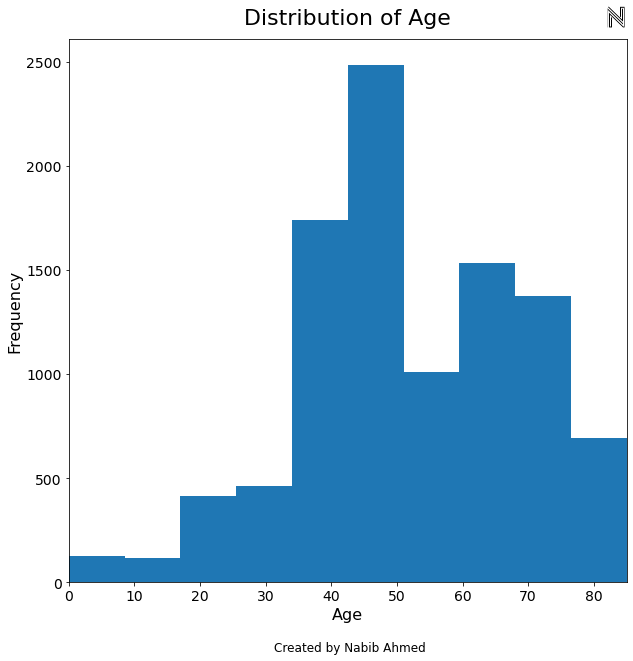

In [26]:
def age_distribution(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # extract the data
    d = metadata_df["age"]

    
    # make a plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.hist(d)
    
    #add axis labels
    ax.set_ylabel('Frequency', fontsize=16, rotation=90)
    ax.set_xlabel('Age', fontsize=16, rotation=0)
    
    # adjust the position of label
    # ax.yaxis.set_label_coords(0, 1.03)
    # ax.xaxis.set_label_coords(1.0, -.03)
    
    # adjust the tick mark
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    # adjust the limits
    ax.set_xlim(xmin=0, xmax = 85)

    # add title
    ax.set_title("Distribution of Age", fontsize=22, pad=15)
    
    # add Created by Nabib Ahmed
    fig.text(0.41, 0.03, "Created by Nabib Ahmed", fontsize=12)

    # add Logo
    logo = fig.add_axes([.87, .895, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "age_distribution"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
age_distribution(save = True)

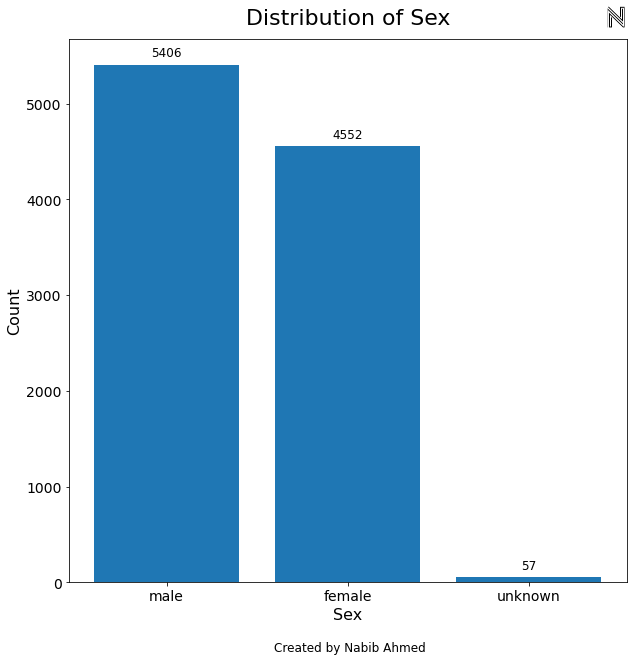

In [27]:
def sex_distribution(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # extract the data
    d = metadata_df["sex"]
    
    label, count = d.value_counts().index, d.value_counts().values

    
    # make a plot
    fig, ax = plt.subplots(figsize=(10,10))
    bars = ax.bar(label, count)
    
    #add axis labels
    ax.set_ylabel('Count', fontsize=16, rotation=90)
    ax.set_xlabel('Sex', fontsize=16, rotation=0)
    
    # adjust the position of label
    # ax.yaxis.set_label_coords(0, 1.03)
    # ax.xaxis.set_label_coords(1.0, -.03)
    
    # adjust the tick mark
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    # add title
    ax.set_title("Distribution of Sex", fontsize=22, pad=15)
    
    # add Created by Nabib Ahmed
    fig.text(0.41, 0.03, "Created by Nabib Ahmed", fontsize=12)
    
    # add counts on the bars
    ax.bar_label(bars, padding = 5, fontsize=12)

    # add Logo
    logo = fig.add_axes([.87, .895, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "sex_distribution"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
sex_distribution(save = True)

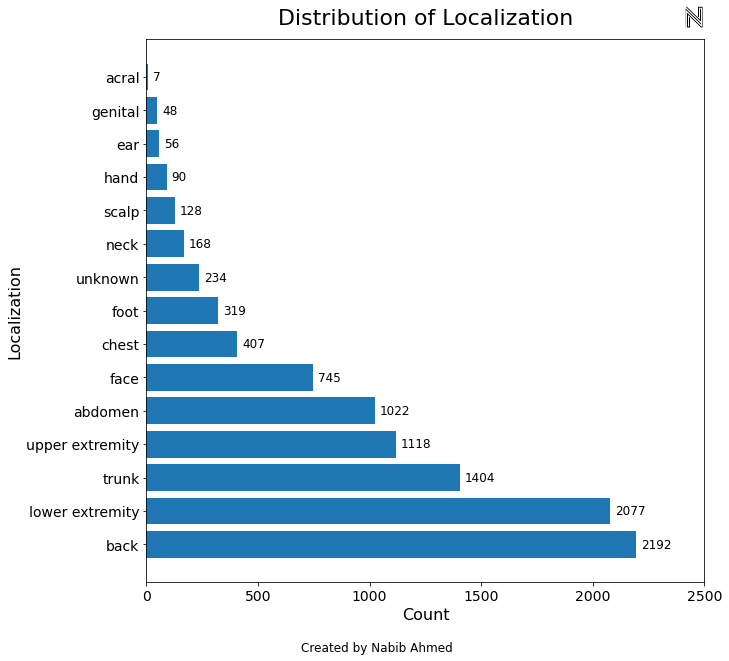

In [28]:
def localization_distribution(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # extract the data
    d = metadata_df["localization"]
    
    label, count = d.value_counts().index, d.value_counts().values

    
    # make a plot
    fig, ax = plt.subplots(figsize=(10,10))
    bars = ax.barh(label, count)
    
    #add axis labels
    ax.set_ylabel('Localization', fontsize=16, rotation=90)
    ax.set_xlabel('Count', fontsize=16, rotation=0)
    
    # adjust the position of label
    # ax.yaxis.set_label_coords(0, 1.03)
    # ax.xaxis.set_label_coords(1.0, -.03)
    
    # adjust the tick mark
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    # adjust the limits
    ax.set_xlim(xmin=0, xmax = 2500)

    # add title
    ax.set_title("Distribution of Localization", fontsize=22, pad=15)
    
    # add Created by Nabib Ahmed
    fig.text(0.34, 0.03, "Created by Nabib Ahmed", fontsize=12)
    
    # add counts on the bars
    ax.bar_label(bars, padding = 5, fontsize=12)

    # add Logo
    logo = fig.add_axes([.87, .895, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "localization_distribution"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
localization_distribution(save = True)

# Diving Deeper into the HAM10000 Dataset

In [292]:
import cv2

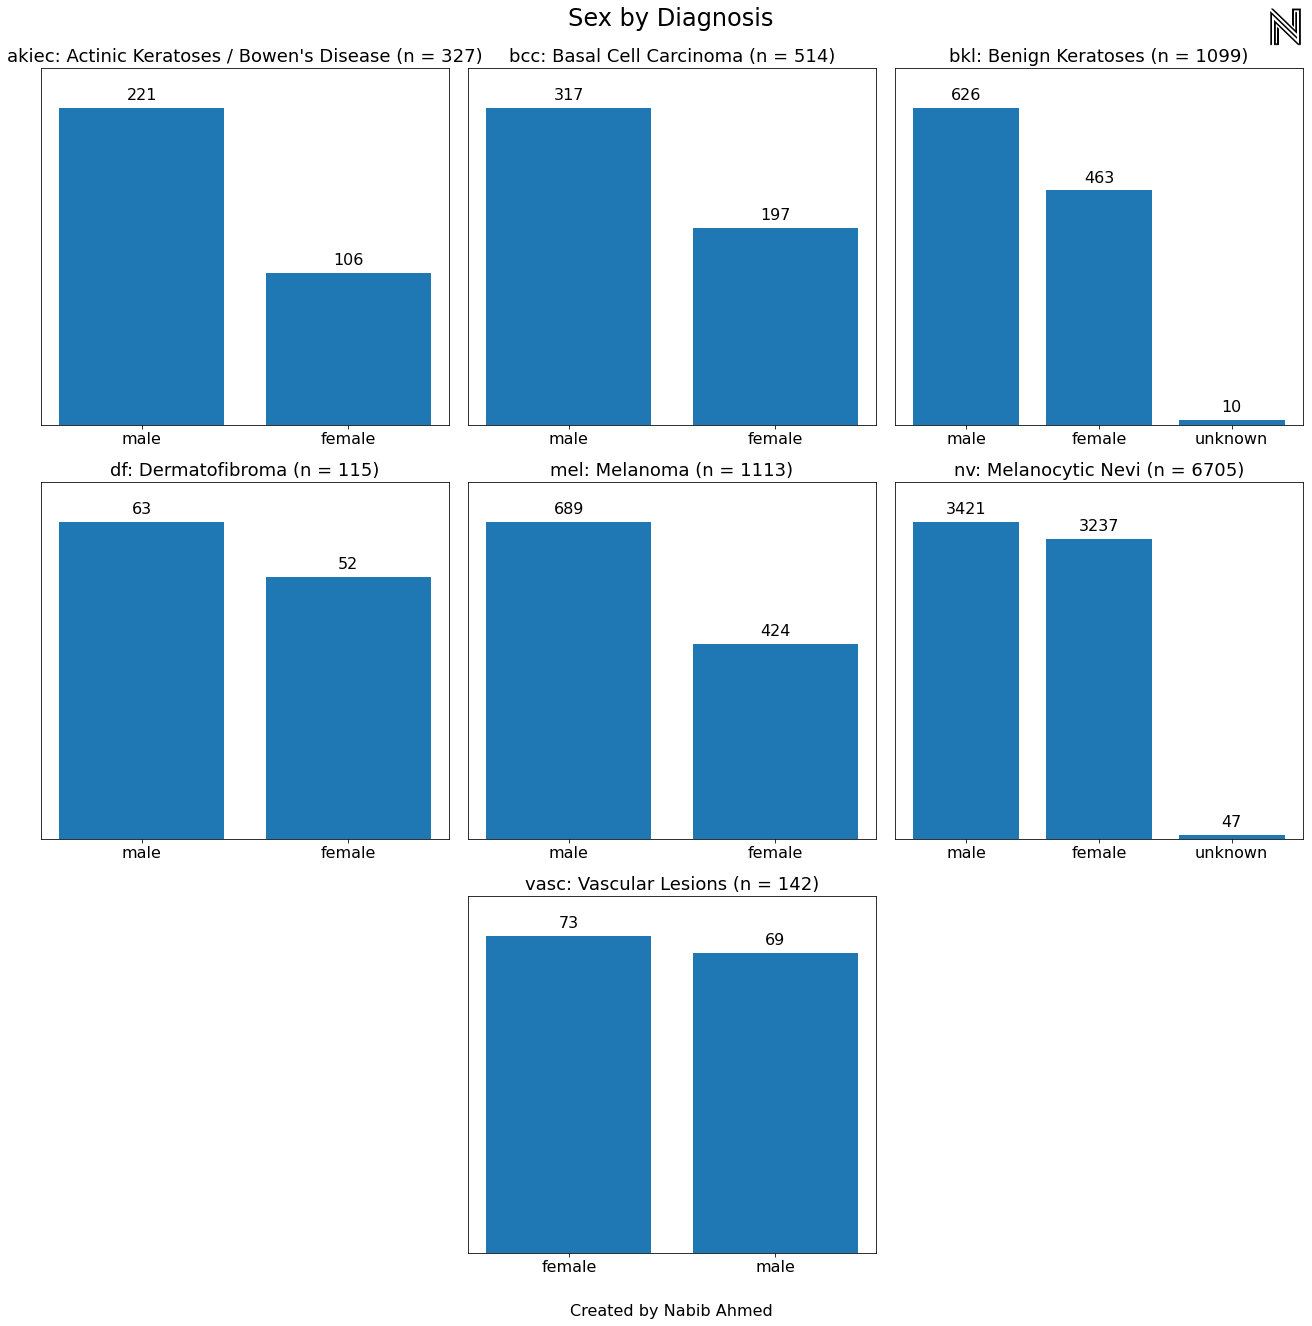

In [151]:
def sex_by_diagnosis(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # diagnosis to code
    CODE_TO_FULL = {
        'akiec': "Actinic Keratoses / Bowen's Disease", 
        'bcc': "Basal Cell Carcinoma", 
        'bkl': "Benign Keratoses", 
        'df': "Dermatofibroma", 
        'mel': "Melanoma", 
        'nv': "Melanocytic Nevi", 
        'vasc': "Vascular Lesions"
    }
    
    # diagnosis to index
    CODE_TO_POS = {
        'akiec': (0, 0), 
        'bcc': (0, 1), 
        'bkl': (0, 2),
        'df': (1, 0), 
        'mel': (1, 1), 
        'nv': (1, 2), 
        'vasc': (2, 1)
    }
    
    fig, axs = plt.subplots(3, 3, figsize=(18,18))
    for dx, dx_full in CODE_TO_FULL.items():
        # get split of dataframe
        df_dx = df[df["dx"] == dx]
        
        # get the data
        d = df_dx["sex"]
    
        # get bar chart
        label, count = d.value_counts().index, d.value_counts().values

        # get the pos
        P = CODE_TO_POS[dx]
        
        # make a plot
        bars = axs[P].bar(label, count)
        
        # add title
        axs[P].set_title(f'{dx}: {CODE_TO_FULL[dx]} (n = {len(df_dx)})', fontsize=18)
        
        # set tick marks
        # axs[P].get_xaxis().set_visible(False)
        axs[P].get_yaxis().set_visible(False)
        
        # set ytick fontsize
        axs[P].xaxis.set_tick_params(labelsize=16)
        
        # add the bar labels
        axs[P].bar_label(bars, padding = 5, fontsize=16, color = "black")
        
        # set the ylim
        axs[P].set_ylim(0, max(count) + max(count) / 8)
    
    # turn off other subplot
    axs[2, 0].axis('off')
    axs[2, 2].axis('off')
    
    # add title
    fig.suptitle('Sex by Diagnosis', y = 0.99, fontsize = 24)
    fig.tight_layout(pad=1.5)
    
    # add Created by Nabib Ahmed
    fig.text(0.423, -0.02, "Created by Nabib Ahmed", fontsize=16)
    
    # add logo
    logo = fig.add_axes([.96, .96, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "sex_by_diagnosis"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
sex_by_diagnosis(save = True)

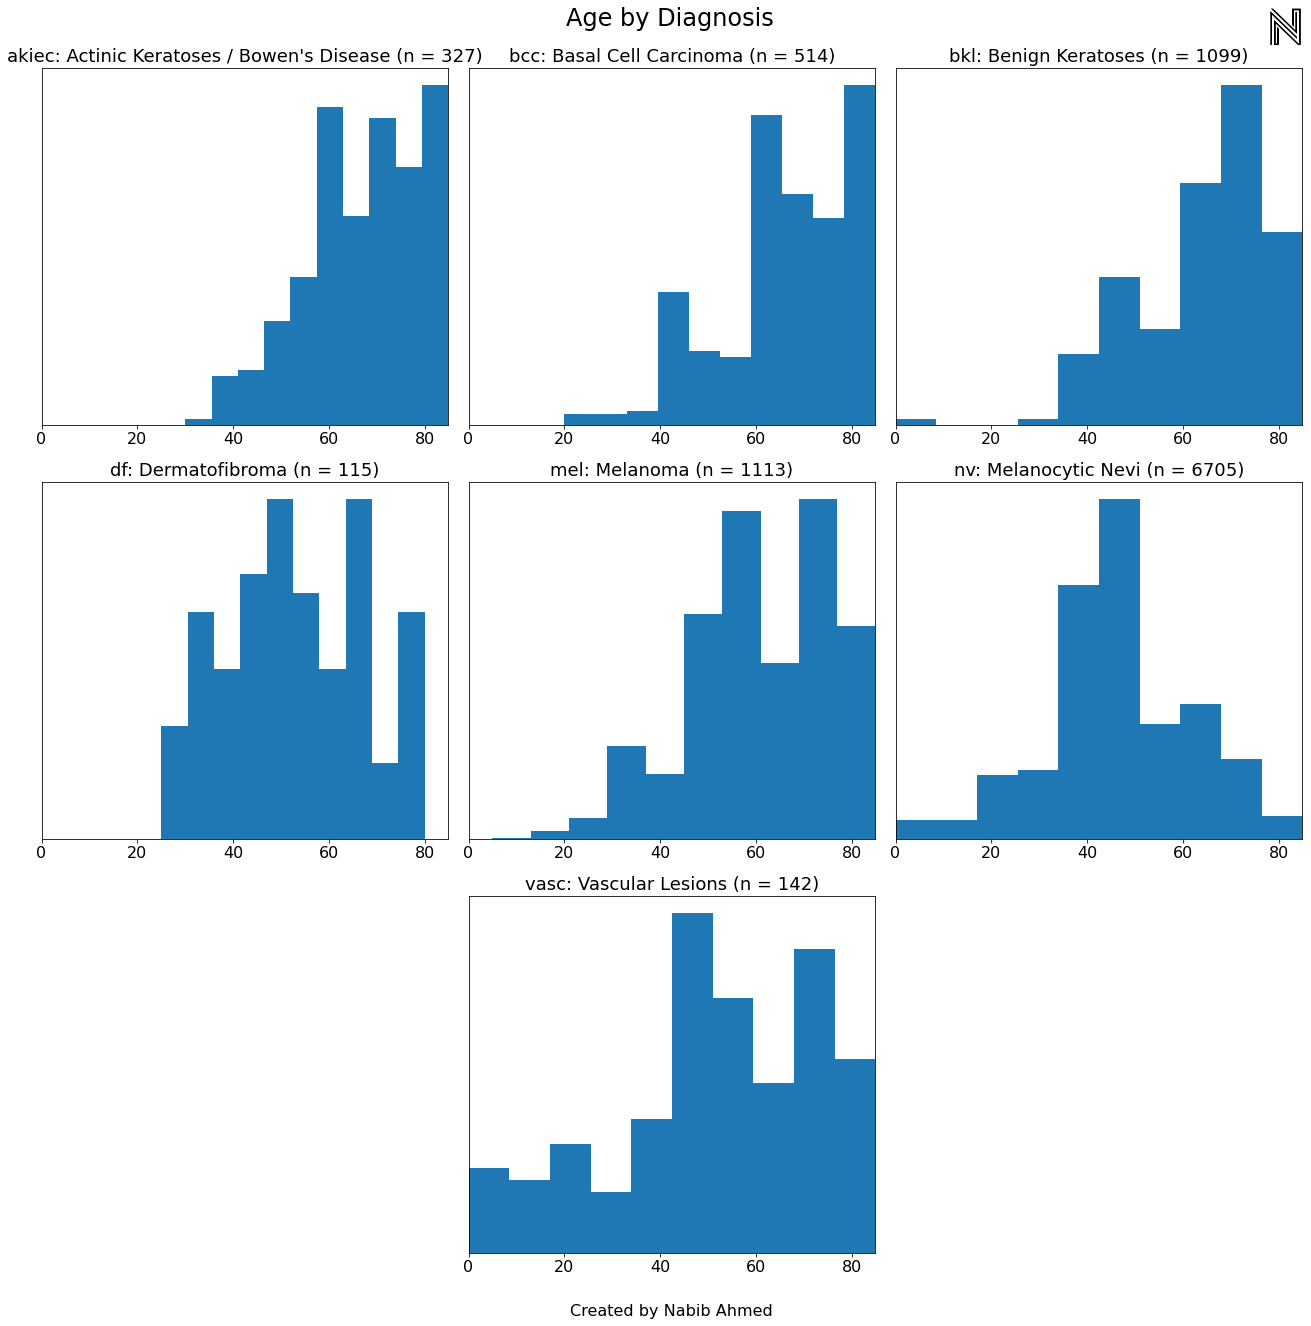

In [150]:
def age_by_diagnosis(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # diagnosis to code
    CODE_TO_FULL = {
        'akiec': "Actinic Keratoses / Bowen's Disease", 
        'bcc': "Basal Cell Carcinoma", 
        'bkl': "Benign Keratoses", 
        'df': "Dermatofibroma", 
        'mel': "Melanoma", 
        'nv': "Melanocytic Nevi", 
        'vasc': "Vascular Lesions"
    }
    
    # diagnosis to index
    CODE_TO_POS = {
        'akiec': (0, 0), 
        'bcc': (0, 1), 
        'bkl': (0, 2),
        'df': (1, 0), 
        'mel': (1, 1), 
        'nv': (1, 2), 
        'vasc': (2, 1)
    }
    
    fig, axs = plt.subplots(3, 3, figsize=(18,18))
    for dx, dx_full in CODE_TO_FULL.items():
        # get split of dataframe
        df_dx = df[df["dx"] == dx]
        
        # get the data
        d = df_dx["age"]
    
        # get the pos
        P = CODE_TO_POS[dx]
        
        # make a plot
        axs[P].hist(d)
        
        # add title
        axs[P].set_title(f'{dx}: {CODE_TO_FULL[dx]} (n = {len(df_dx)})', fontsize=18)
        
        # set tick marks
        axs[P].get_yaxis().set_visible(False)
        
        # set ytick fontsize
        axs[P].xaxis.set_tick_params(labelsize=16)
        
        # set the ylim
        axs[P].set_xlim(0, 85)
    
    # turn off other subplot
    axs[2, 0].axis('off')
    axs[2, 2].axis('off')
    
    # add title
    fig.suptitle('Age by Diagnosis', y = 0.99, fontsize = 24)
    fig.tight_layout(pad=1.5)
    
    # add Created by Nabib Ahmed
    fig.text(0.423, -0.02, "Created by Nabib Ahmed", fontsize=16)
    
    # add logo
    logo = fig.add_axes([.96, .96, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "age_by_diagnosis"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
age_by_diagnosis(save = True)

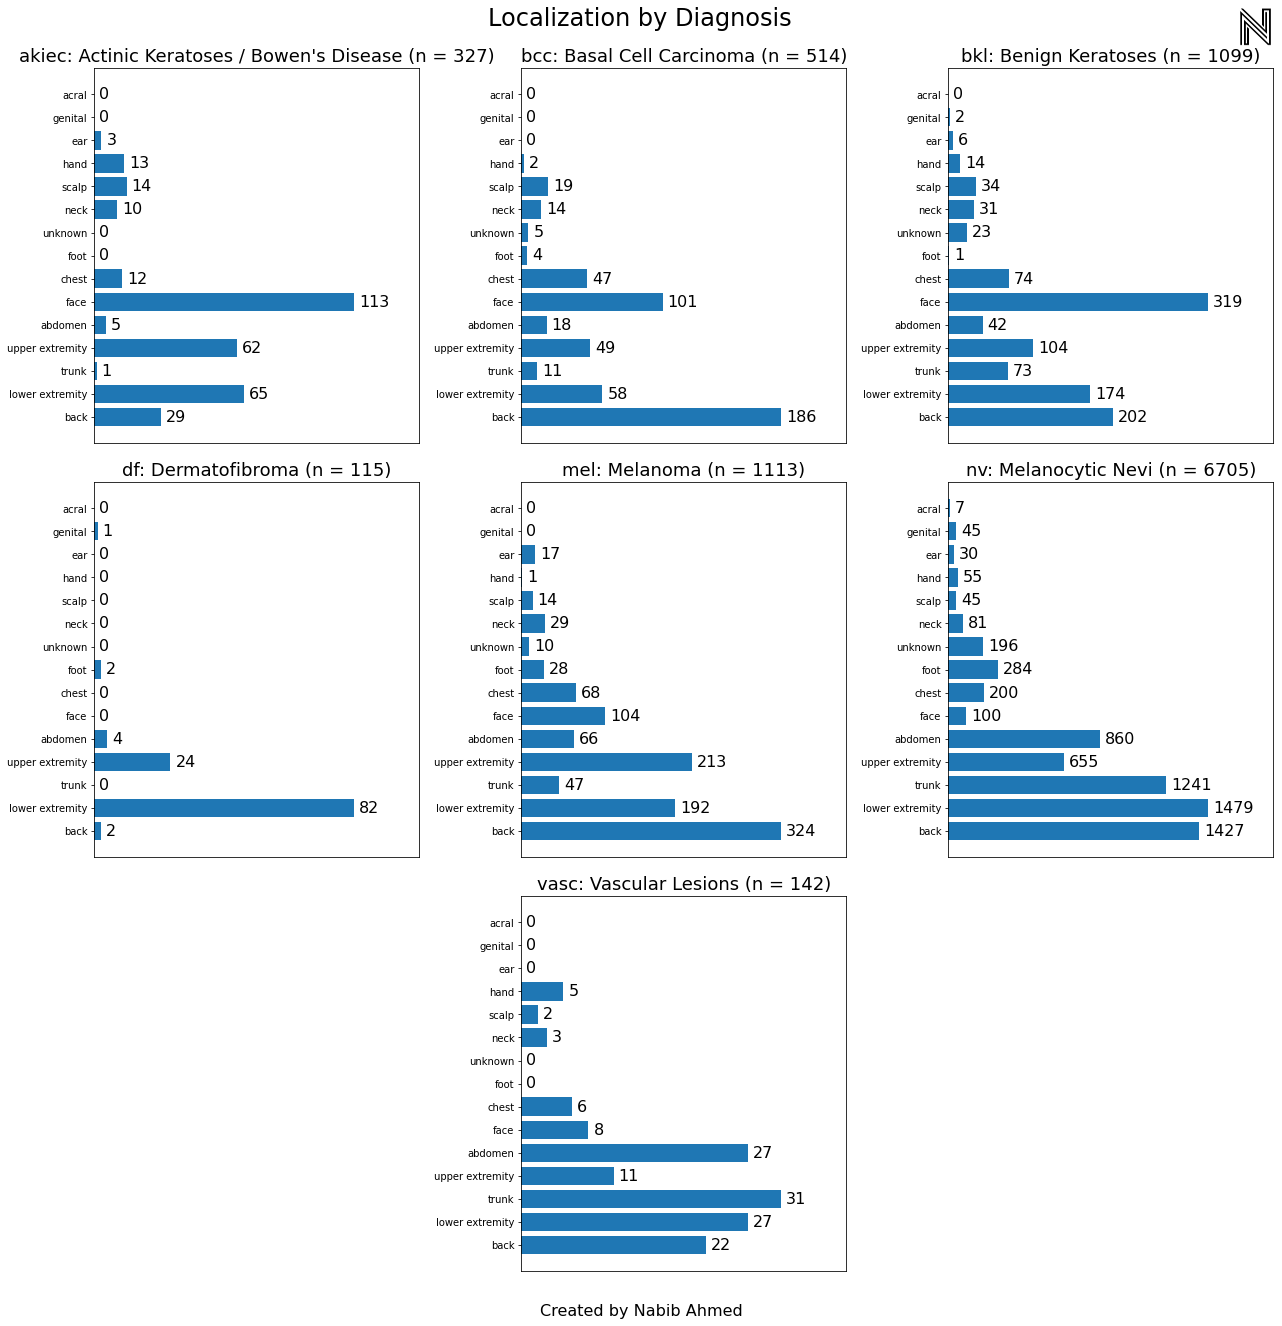

In [149]:
def localization_by_diagnosis(metadata_df = metadata_df, save: bool = False) -> None:
    # make a copy of the df
    df = metadata_df.copy()
    
    # get the localizations
    localizations = df["localization"].value_counts().index
    
    # diagnosis to code
    CODE_TO_FULL = {
        'akiec': "Actinic Keratoses / Bowen's Disease", 
        'bcc': "Basal Cell Carcinoma", 
        'bkl': "Benign Keratoses", 
        'df': "Dermatofibroma", 
        'mel': "Melanoma", 
        'nv': "Melanocytic Nevi", 
        'vasc': "Vascular Lesions"
    }
    
    # diagnosis to index
    CODE_TO_POS = {
        'akiec': (0, 0), 
        'bcc': (0, 1), 
        'bkl': (0, 2),
        'df': (1, 0), 
        'mel': (1, 1), 
        'nv': (1, 2), 
        'vasc': (2, 1)
    }
    
    fig, axs = plt.subplots(3, 3, figsize=(18,18))
    for dx, dx_full in CODE_TO_FULL.items():
        # get split of dataframe
        df_dx = df[df["dx"] == dx]
        
        # get the data
        d = df_dx["localization"]
    
        # get bar chart data
        label, count = d.value_counts().index, d.value_counts().values
        
        data_dict = {l: 0 for l in localizations}
        for l, c in zip(label, count):
            data_dict[l] = c
        
        label, count = list(data_dict.keys()), list(data_dict.values())

        # get the pos
        P = CODE_TO_POS[dx]
        
        # make a plot
        bars = axs[P].barh(label, count)
        
        # add title
        axs[P].set_title(f'{dx}: {CODE_TO_FULL[dx]} (n = {len(df_dx)})', fontsize=18)
        
        # set tick marks
        # axs[P].get_yaxis().set_visible(False)
        axs[P].get_xaxis().set_visible(False)
        
        # set ytick fontsize
        axs[P].xaxis.set_tick_params(labelsize=20)
        
        # add the bar labels
        axs[P].bar_label(bars, padding = 5, fontsize=16, color = "black")
        
        # set the ylim
        axs[P].set_xlim(0, max(count) + max(count) / 4)
    
    # turn off other subplot
    axs[2, 0].axis('off')
    axs[2, 2].axis('off')
    
    # add title
    fig.suptitle('Localization by Diagnosis', y = 0.99, fontsize = 24)
    fig.tight_layout(pad=1.5)
    
    # add Created by Nabib Ahmed
    fig.text(0.423, -0.02, "Created by Nabib Ahmed", fontsize=16)
    
    # add logo
    logo = fig.add_axes([.96, .96, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "localization_by_diagnosis"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    
localization_by_diagnosis(save = True)

In [152]:
len(metadata_df["localization"].value_counts())

15

# Skin Tone Analysis with HAM10000

In [418]:
import time

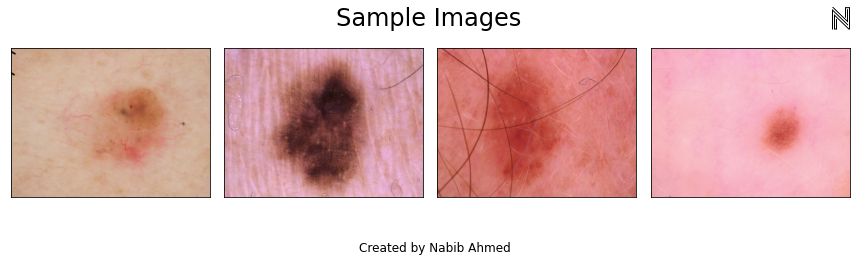

In [275]:
def sample_images(metadata_df = metadata_df, save: bool = False) -> None:
    image_ids = [
        "0024452",
        "0024694",
        "0024527",
        "0024663"
    ]
    
    fig, axs = plt.subplots(1, len(image_ids), figsize=(12,4))
    
    for i, _id in enumerate(image_ids):
        # plot images
        axs[i].imshow(plot_one_image(_id, False))
        
        # remove tick marks
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        
    # spacing
    fig.tight_layout()
    
    # add title
    fig.suptitle('Sample Images', y = 0.90, fontsize = 24)
    
    # add Created by Nabib Ahmed
    fig.text(0.42, 0.05, "Created by Nabib Ahmed", fontsize=12)
    
    # add logo
    logo = fig.add_axes([.91, .82, .08, .08], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "four_sample_images"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    

sample_images(save = True)

207 166 142
186 130 137
208 111 105
246 178 191


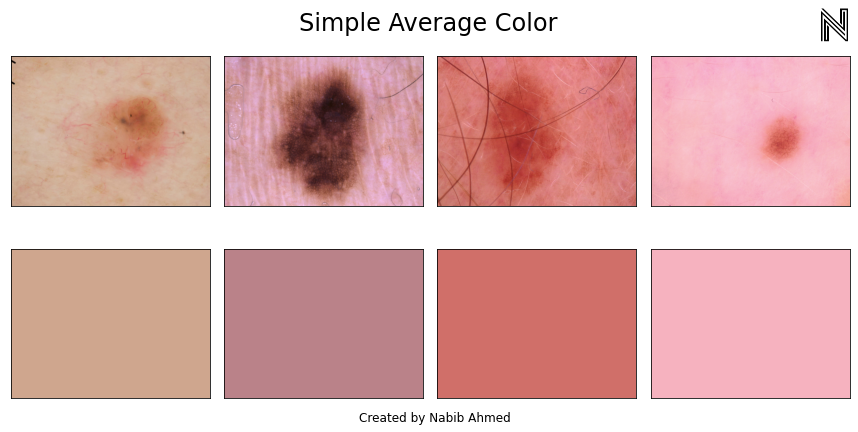

In [391]:
def simple_average(metadata_df = metadata_df, save: bool = False) -> None:
    image_ids = [
        "0024452",
        "0024694",
        "0024527",
        "0024663"
    ]
    
    fig, axs = plt.subplots(2, len(image_ids), figsize=(12,6))
    
    for i, _id in enumerate(image_ids):
        # get image data
        img = plot_one_image(_id, False)

        # plot images
        axs[(0, i)].imshow(img)
        
        # remove tick marks
        axs[(0, i)].get_xaxis().set_visible(False)
        axs[(0, i)].get_yaxis().set_visible(False)
        
        # calculate the image average
        r, g, b = np.mean(img[:, :, 0]), np.mean(img[:, :, 1]), np.mean(img[:, :, 2])
        color = np.zeros(img.shape)
        color[:, :, 0] = r
        color[:, :, 1] = g
        color[:, :, 2] = b
        
        axs[(1, i)].imshow(color.astype(int))
        
        # remove tick marks
        axs[(1, i)].get_xaxis().set_visible(False)
        axs[(1, i)].get_yaxis().set_visible(False)
        
        # print the colors
        print(int(r), int(g), int(b))
        
        
    # spacing
    fig.tight_layout()
    
    # add title
    fig.suptitle('Simple Average Color', y = 1, fontsize = 24)
    
    # add Created by Nabib Ahmed
    fig.text(0.42, 0.05, "Created by Nabib Ahmed", fontsize=12)
    
    # add logo
    logo = fig.add_axes([.91, .93, .08, .08], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "simple_avg_image"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    

simple_average(save = True)

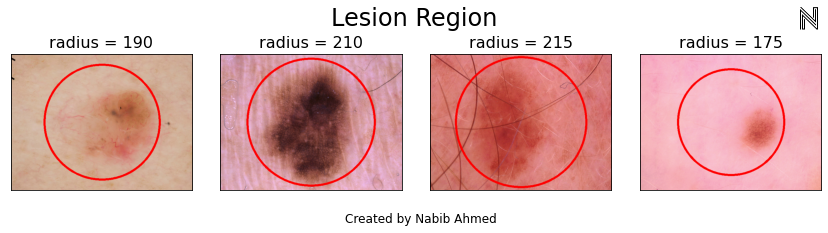

In [329]:
def circle_regions(metadata_df = metadata_df, save: bool = False) -> None:
    image_ids = [
        "0024452",
        "0024694",
        "0024527",
        "0024663"
    ]
    image_id_to_radius = {
        "0024452": 190,
        "0024694": 210,
        "0024527": 215,
        "0024663": 175
    }
    
    fig, axs = plt.subplots(1, len(image_ids), figsize=(12,4))
    
    for i, _id in enumerate(image_ids):
        # get the img
        img = plot_one_image(_id, False)
        center_coord = (int(img.shape[1] / 2), int(img.shape[0] / 2))
        radius = image_id_to_radius[_id]
        color = (255, 0, 0)
        thickness = 5
        img = cv2.circle(img, center_coord, radius, color, thickness)
        
        # plot images
        axs[i].imshow(img)
        
        # remove tick marks
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        
        # add title
        axs[i].set_title(f"radius = {radius}", fontsize=16)
        
    # spacing
    fig.tight_layout(pad=2.5)
    
    # add title
    fig.suptitle('Lesion Region', y = 0.90, fontsize = 24)
    
    # add Created by Nabib Ahmed
    fig.text(0.42, 0.15, "Created by Nabib Ahmed", fontsize=12)
    
    # add logo
    logo = fig.add_axes([.89, .82, .08, .08], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "circle_regions"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    

circle_regions(save = True)

207 173 150
215 159 172
212 120 115
247 180 193


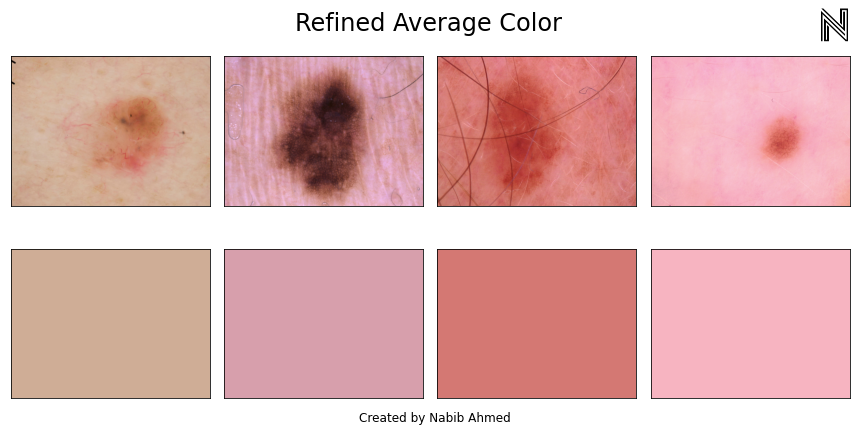

In [397]:
def refined_average(metadata_df = metadata_df, save: bool = False) -> None:
    image_ids = [
        "0024452",
        "0024694",
        "0024527",
        "0024663"
    ]
    image_id_to_radius = {
        "0024452": 190,
        "0024694": 210,
        "0024527": 215,
        "0024663": 175
    }
    avg_r = 197
    
    fig, axs = plt.subplots(2, len(image_ids), figsize=(12,6))
    
    for i, _id in enumerate(image_ids):
        # get image data
        img = plot_one_image(_id, False)

        # plot images
        axs[(0, i)].imshow(img)
        
        # remove tick marks
        axs[(0, i)].get_xaxis().set_visible(False)
        axs[(0, i)].get_yaxis().set_visible(False)
        
        
#         # filter based on radius
        center_coord = (int(img.shape[1] / 2), int(img.shape[0] / 2))
#         radius = avg_r
#         color = (255, 255, 255)
#         thickness = -1
#         img = cv2.circle(img, center_coord, radius, color, thickness)
        
#         axs[(1, i)].imshow(img)
        
        # calculate the image average with the center removed
        dummy_img = np.zeros(img.shape) # will be filtered out
        H, W, _ = img.shape
        for h in range(H):
            for w in range(W):
                if np.sqrt((w - center_coord[0])**2 + (h - center_coord[1])**2) <= 197:
                    dummy_img[h, w] = -1
                else:
                    dummy_img[h, w] = img[h, w]
        
        dummy_img = np.where(dummy_img == -1, np.nan, dummy_img)
        
        r, g, b = np.nanmean(dummy_img[:, :, 0]), np.nanmean(dummy_img[:, :, 1]), np.nanmean(dummy_img[:, :, 2])
        color = np.zeros(img.shape)
        color[:, :, 0] = r
        color[:, :, 1] = g
        color[:, :, 2] = b
        
        axs[(1, i)].imshow(color.astype(int))
        
        # remove tick marks
        axs[(1, i)].get_xaxis().set_visible(False)
        axs[(1, i)].get_yaxis().set_visible(False)
        
        print(int(r), int(g), int(b))
        
        
    # spacing
    fig.tight_layout()
    
    # add title
    fig.suptitle('Refined Average Color', y = 1, fontsize = 24)
    
    # add Created by Nabib Ahmed
    fig.text(0.42, 0.05, "Created by Nabib Ahmed", fontsize=12)
    
    # add logo
    logo = fig.add_axes([.91, .93, .08, .08], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "refined_average_img"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    

refined_average(save = True)

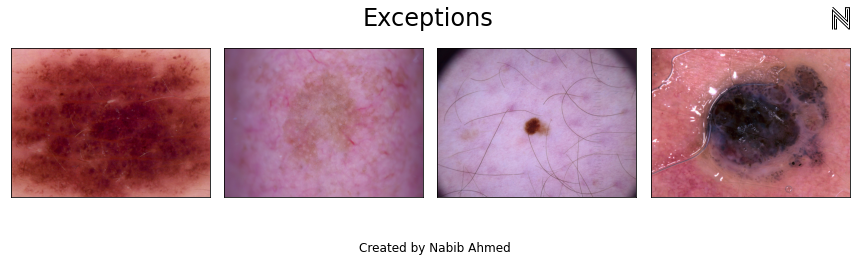

In [401]:
def bad_sample_images(metadata_df = metadata_df, save: bool = False) -> None:
    image_ids = [
        "0024945",
        "0024877",
        "0025001",
        "0024823"
    ]
    
    fig, axs = plt.subplots(1, len(image_ids), figsize=(12,4))
    
    for i, _id in enumerate(image_ids):
        # plot images
        axs[i].imshow(plot_one_image(_id, False))
        
        # remove tick marks
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        
    # spacing
    fig.tight_layout()
    
    # add title
    fig.suptitle('Exceptions', y = 0.90, fontsize = 24)
    
    # add Created by Nabib Ahmed
    fig.text(0.42, 0.05, "Created by Nabib Ahmed", fontsize=12)
    
    # add logo
    logo = fig.add_axes([.91, .82, .08, .08], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "bad_sample_images"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    

bad_sample_images(save = True)

In [419]:
def skintones(image_ids = image_ids, status = True):
#     image_ids = [
#         "0024452",
#         "0024694",
#         "0024527",
#         "0024663"
#     ]
    
    skintone_data = {}
    
    # create mask of which numbers to keep
    shape = (450, 600, 3)
    avg_r = 197
    center_coord = (int(shape[1] / 2), int(shape[0] / 2))
    
    dummy_img = np.zeros(shape) # will be filtered out
    H, W, _ = shape
    for h in range(H):
        for w in range(W):
            if np.sqrt((w - center_coord[0])**2 + (h - center_coord[1])**2) <= avg_r:
                dummy_img[h, w] = -1
            else:
                dummy_img[h, w] = 1
    
    # loop and keep the refined average
    start = time.time()
    for count, i in enumerate(image_ids):
        img = plot_one_image(i, False)
        img = img * dummy_img
        img = np.where(img < 0, np.nan, img)
   
        r, g, b = np.nanmean(img[:, :, 0]), np.nanmean(img[:, :, 1]), np.nanmean(img[:, :, 2])
        
        # add to dictionary
        skintone_data[i] = (int(r), int(g), int(b))
        
        # progress tracker
        if status:
            if count % 500 == 0:
                end = time.time()
                print(f"Completed iteration {count}; progress: {100 * count / len(image_ids):.0f}%")
                print(f"Time elapsed: {(end - start) / 60:.2f} mins")
        
    return skintone_data


skintone_data = skintones()

Completed iteration 0; progress: 0%
Time elapsed: 0.00 mins
Completed iteration 500; progress: 5%
Time elapsed: 0.07 mins
Completed iteration 1000; progress: 10%
Time elapsed: 0.14 mins
Completed iteration 1500; progress: 15%
Time elapsed: 0.21 mins
Completed iteration 2000; progress: 20%
Time elapsed: 0.28 mins
Completed iteration 2500; progress: 25%
Time elapsed: 0.35 mins
Completed iteration 3000; progress: 30%
Time elapsed: 0.42 mins
Completed iteration 3500; progress: 35%
Time elapsed: 0.50 mins
Completed iteration 4000; progress: 40%
Time elapsed: 0.58 mins
Completed iteration 4500; progress: 45%
Time elapsed: 0.65 mins
Completed iteration 5000; progress: 50%
Time elapsed: 0.72 mins
Completed iteration 5500; progress: 55%
Time elapsed: 0.79 mins
Completed iteration 6000; progress: 60%
Time elapsed: 0.86 mins
Completed iteration 6500; progress: 65%
Time elapsed: 0.93 mins
Completed iteration 7000; progress: 70%
Time elapsed: 1.00 mins
Completed iteration 7500; progress: 75%
Time e

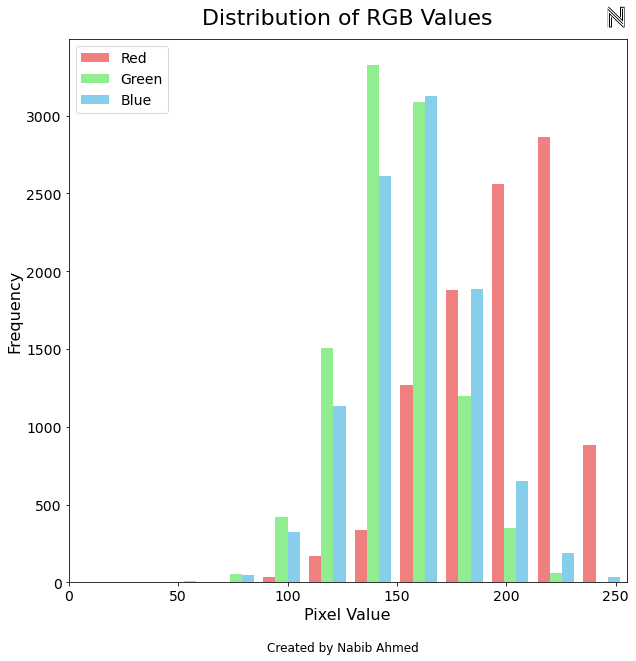

In [446]:
def skintone_graph(skintone_data = skintone_data, save: bool = False):
    R, G, B = [], [], []
    for _id in skintone_data:
        r, g, b = skintone_data[_id]
        R.append(r)
        G.append(g)
        B.append(b)
     
    # make a plot
    fig, ax = plt.subplots(figsize=(10,10))
    bins = np.linspace(0, 255, 1)
    
    ax.hist([R, G, B], color = ['lightcoral', 'lightgreen', 'skyblue'], label=['Red', 'Green', 'Blue'])
    ax.legend(loc='upper left', fontsize = 14)
    
    # fix limits
    ax.set_xlim(xmin=0, xmax = 255)
    
    #add axis labels
    ax.set_ylabel('Frequency', fontsize=16, rotation=90)
    ax.set_xlabel('Pixel Value', fontsize=16, rotation=0)
    
    
    # adjust the tick mark
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    # add title
    ax.set_title("Distribution of RGB Values", fontsize=22, pad=15)
    
    # add Created by Nabib Ahmed
    fig.text(0.4, 0.03, "Created by Nabib Ahmed", fontsize=12)

    # add Logo
    logo = fig.add_axes([.87, .895, .03, .03], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "skintone_graph"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")

skintone_graph(save = True)

In [ ]:
def generate_sample_skintones(metadata_df = metadata_df, save: bool = False) -> None:
    fig, axs = plt.subplots(1, 4, figsize=(12,4))
    shape = (450, 600, 3)
    rng = np.random.default_rng(10000)

    for i in range(4):
        # get the img
        color = np.zeros(shape)
        color[:, :, 0] = rng.integers(180, 225, size=1)
        color[:, :, 1] = rng.integers(135, 165, size=1) 
        color[:, :, 2] = rng.integers(135, 165, size=1)
        
        
        
        # plot images
        axs[i].imshow(color)
        
        # remove tick marks
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        
        # add title
#         axs[i].set_title(f"radius = {radius}", fontsize=16)
        
    # spacing
    fig.tight_layout(pad=2.5)
    
    # add title
    fig.suptitle('Lesion Region', y = 0.90, fontsize = 24)
    
    # add Created by Nabib Ahmed
    fig.text(0.42, 0.15, "Created by Nabib Ahmed", fontsize=12)
    
    # add logo
    logo = fig.add_axes([.89, .82, .08, .08], anchor='NE', zorder=2)
    logo.imshow(LOGO)
    logo.axis('off')
    
    # save figure
    name = "generate_sample_skintones"
    if save:
        plt.savefig(f"{os.path.join(base_dir, 'output', name)}.png", dpi=300, bbox_inches = "tight")
    

generate_sample_skintones(save = False)

KeyboardInterrupt: 